In [9]:
import ROOT , time , os, sys , math , datetime
from ROOT import TPlots, TAnalysis, TAnalysisEG2 , TEG2dm , TCalcPhysVarsEG2 , TSchemeDATA ,GenerateEvents
sys.path.insert(0, '/Users/erezcohen/larlite/UserDev/mySoftware/MySoftwarePackage/mac')
sys.path.insert(0, '/home/erez/larlite/UserDev/mySoftware/MySoftwarePackage/mac')
sys.path.insert(0, '../../GSIMulation')
import matplotlib as mpl, pandas as pd , numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
dm = TEG2dm()

In [11]:
def draw_projection_theta_phi(h,name):
    hProjYZ = h.Project3D("yz")
    hThetaPhi = hProjYZ.Clone("hThetaPhi")
    fig = plt.figure(figsize=[10,5])
    fig, ax = plt.subplots(1,1, figsize=(10,10), subplot_kw={'aspect':'equal'})
    NbinsTheta = hThetaPhi.GetXaxis().GetNbins()
    NbinsPhi = hThetaPhi.GetYaxis().GetNbins()
    H = np.ones((NbinsTheta, NbinsPhi))
    for bin_theta in range(NbinsTheta):
        for bin_phi in range(NbinsPhi):
            bin_content = float(hThetaPhi.GetBinContent(bin_theta,bin_phi)) / (30*100)
            H[bin_theta][bin_phi]= bin_content 
    extent = [0,120,-30,330]
    im = plt.imshow(H,interpolation='none', cmap='hot_r',origin='lower', extent=extent)
    im = ax.imshow(np.ma.masked_where(H == 0, H), cmap='hot_r', interpolation='none', origin='lower', extent=extent)
    ax.set_xlabel('$\\theta$ [deg.]',fontsize=25)
    ax.set_ylabel('$\\phi$ [deg.]',fontsize=25)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(25) 
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(25) 
    ax.set_aspect('auto')
    cb = plt.colorbar()
    for t in cb.ax.get_yticklabels():
         t.set_fontsize(20)
    outfile_name = "/Users/erezcohen/Desktop/acceptance_theta_phi_%s.pdf"%name
    plt.savefig( outfile_name )

In [12]:
def draw_projection_mag(h):
    hProjYZ = h.Project3D("yz")
    hThetaPhi = hProjYZ.Clone("hThetaPhi")
    fig = plt.figure(figsize=[10,5])
    fig, ax = plt.subplots(1,1, figsize=(10,10), subplot_kw={'aspect':'equal'})
    NbinsTheta = hThetaPhi.GetXaxis().GetNbins()
    NbinsPhi = hThetaPhi.GetYaxis().GetNbins()
    hProjX = h.Project3D("x")
    hMag = hProjX.Clone("hMag")
    fig = plt.figure(figsize=[10,5])
    fig, ax = plt.subplots(1,1, figsize=(10,10), subplot_kw={'aspect':'equal'})
    NbinsMag = hMag.GetXaxis().GetNbins()
    H = np.ones(NbinsMag)
    for bin_mag in range(NbinsMag):
        bin_content = float(hMag.GetBinContent(bin_mag)) / (NbinsTheta*NbinsPhi)
        H[bin_mag]= bin_content 
    im = plt.hist(H)
    ax.set_xlabel('|p| [Gev/c]',fontsize=25)
    ax.set_ylabel('acceptance [%]',fontsize=25)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(25) 
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(25) 
    ax.set_aspect('auto')

In [13]:
# acceptance with no fiducials...
pAcceptacneFile = ROOT.TFile("/Users/erezcohen/Desktop/DataMining/GSIM_DATA/PrecoilAcceptance.root")
h = pAcceptacneFile.Get("hRescaled")
hAcceptanceAll = h.Clone("hAcceptanceAll")
hAcceptanceFiducial = h.Clone("hAcceptanceFiducial")
    
p_recoil = ROOT.TVector3()
for binx in range(h.GetXaxis().GetNbins()): # p(recoil) magnitude
    p_recoil_mag = h.GetXaxis().GetBinCenter(binx)
        
    for biny in range(h.GetYaxis().GetNbins()): # p(recoil) theta
        p_recoil_theta = h.GetYaxis().GetBinCenter(biny)
            
        for binz in range(h.GetZaxis().GetNbins()): # p(recoil) phi
            p_recoil_phi = h.GetZaxis().GetBinCenter(binz)
                
            p_recoil.SetMagThetaPhi( p_recoil_mag , math.radians(p_recoil_theta) , math.radians(p_recoil_phi) )
            fiducial = dm.protonFiducial ( p_recoil , 1 )
            acceptance = h.GetBinContent(binx,biny,binz)
            hAcceptanceFiducial.SetBinContent( binx, biny, binz, acceptance if fiducial else 0 )



In [3]:
draw_projection_theta_phi( hAcceptanceAll , "full_acceptance" )
draw_projection_theta_phi( hAcceptanceFiducial , "fiducial_region" )

NameError: name 'hAcceptanceAll' is not defined

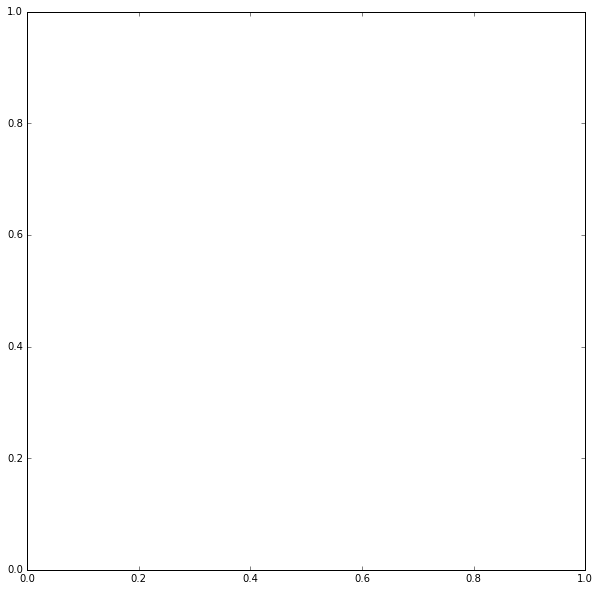

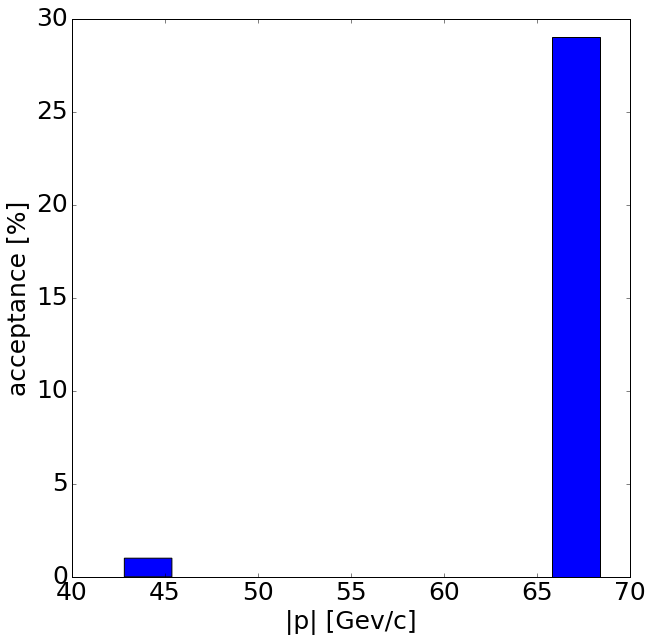

In [14]:
draw_projection_mag(hAcceptanceAll)